# Exercise 8 Blob detection for SIFT discription

These exercises will introduce you to blobs and SIFT features. In this exercise you will write the \
code for the blob detector as well as use the SIFT feature detector and matcher.

**Blob detector**
You will implement a blob detector using the Difference-of-Gaussian (DoG) method and apply it \
to the sample image of sunflowers.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

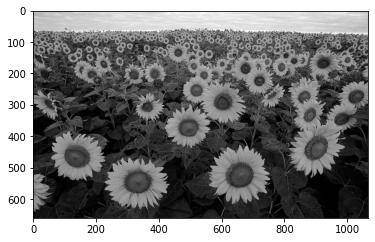

In [2]:
# Load image
img = cv2.imread('sunflowers.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

#### 8.1 Scaling

Create the function ```im_scales = scaleSpaced(im, sigma, n)```, where im_scales is a scale pyramid of the original image im.  \
The width and height of all images in the pyramid im_scales are exactly the same as the original image im. In other words \
im_scales is *not a pyramid in image sizes; only in scale space*. 


This function should apply a Gaussian kernel of width $\sigma 2^i$, \
(where i = 0, 1, . . . , n − 1.)

**NB** This is providing the gaussians that we will then use to create DoG images used in blob detection!

In [51]:
def scaleSpaced(im, sigma, n):
    im_scales = []
    for i in range(n):
        k_size = math.ceil(sigma*(2**i))
        #k_size = sigma*(2**i)
        if k_size % 2 == 0:
            k_size+=1
        blur = cv2.GaussianBlur(im, ksize=(k_size,k_size),
                                sigmaX=k_size)
        im_scales.append(blur.copy())
    return im_scales

**NB** But only increase kernel size? If kernel size = 2*sigma, then we have already got like 97% blurr, what more can we get??

In [52]:
im_scales = scaleSpaced(gray, 1, 8)

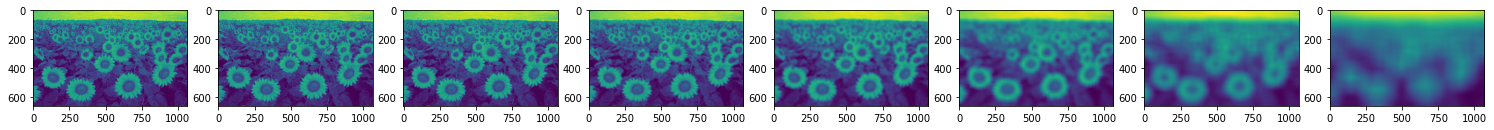

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(26,6))
ax[0].imshow(im_scales[0])
ax[1].imshow(im_scales[1])
ax[2].imshow(im_scales[2])
ax[3].imshow(im_scales[3])
ax[4].imshow(im_scales[4])
ax[5].imshow(im_scales[5])
ax[6].imshow(im_scales[6])
ax[7].imshow(im_scales[7])

#### 8.2 DoG - Difference of gaussians

Now, create the function ```DoG = differenceOfGaussian(im, sigma, n)```, where DoG is the scale \
space DoGs of the original image im. Like the scaleSpaced function, the returned images are all \
the same size as the original.


In [59]:
def differenceOfGaussian(im, sigma, n):
    im_scales = scaleSpaced(im=im, sigma=sigma, n=n)
    DoG = []
    for i in range(1, len(im_scales)):
        DoG.append(im_scales[i] - im_scales[i-1])
    return DoG

In [62]:
DoG = differenceOfGaussian(gray,2, 8)

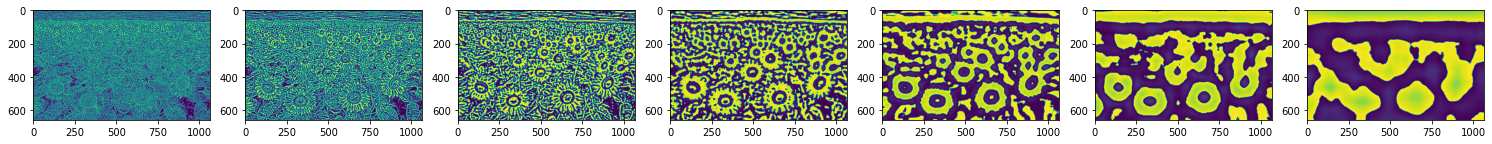

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(26,6))
ax[0].imshow(DoG[0])
ax[1].imshow(DoG[1])
ax[2].imshow(DoG[2])
ax[3].imshow(DoG[3])
ax[4].imshow(DoG[4])
ax[5].imshow(DoG[5])
ax[6].imshow(DoG[6])

#### 8.3 Blob detection

Finally, create the function ```blobs = detectBlobs(im, sigma, n, threshold)```, where blobs are \
the blobs (pixels) of the original image im with a DoG larger than a threshold. You should also \
implement non-maximum suppression to increase the robustness of the detector. \
Try the detector on the image of sunflowers. Visualize your result by drawing a circle for each \
image, with the radius proportional to the scale of the blob. You can use cv2.circle for this.

In [ ]:
def detectBlobs(im, sigma, n, threshold):
    pass

In [ ]:
blobs = detectBlobs(im=gray, sigma=2, n=8, threshold=0.03)